The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Import all the required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# import and analysis the data

In [2]:
train = pd.read_csv('C:\\Users\\divyam07\\Desktop\\Project Datascience\\Titanic\\train.csv')
test = pd.read_csv('C:\\Users\\divyam07\\Desktop\\Project Datascience\\Titanic\\test.csv')


In [4]:
train.shape
test.shape

(418, 11)

In [5]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Smith, Miss. Marion Elsie",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.Age.count()

714

In [7]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# merge both the data 
data = train.append(test)
data.shape

#store the passenger id  of test data
passenger_id = test['PassengerId']
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# cleaning the data 

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
## fillup the missing value 

In [15]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN' , strategy = 'median',axis = 1)
Age_ = imp.fit_transform(train['Age'].values.reshape(1,-1))
Age_ = Age_.T
Age_
train['Age_'] = Age_
train.head()


imp = Imputer(missing_values='NaN' , strategy = 'median',axis = 1)
Age_Test = imp.fit_transform(test['Age'].values.reshape(1,-1))
Age_Test= Age_Test.T
Age_Test.shape
test['Age_Test'] = Age_Test



In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [17]:
test.isnull().sum()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_             0
dtype: int64

In [18]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
train.Embarked.fillna('S' , inplace = True)

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_             0
dtype: int64

In [21]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Age_Test         0
dtype: int64

In [22]:
test.Fare.fillna(test.Fare.mean(), inplace  = True)

In [23]:
train.drop(['Age' , 'Cabin'],axis = 1, inplace = True)
test.drop(['Age' , 'Cabin'], axis = 1 , inplace = True)

In [24]:
train.isnull().sum()
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_Test       0
dtype: int64

In [25]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_
128,129,1,3,"Peter, Miss. Anna",female,1,1,2668,22.3583,C,28.0
603,604,0,3,"Torber, Mr. Ernst William",male,0,0,364511,8.0500,S,44.0
46,47,0,3,"Lennon, Mr. Denis",male,1,0,370371,15.5000,Q,28.0
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,1,0,2003,26.0000,S,28.0
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,1,0,113806,53.1000,S,33.0
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,0,0,113784,35.5000,S,45.0
648,649,0,3,"Willey, Mr. Edward",male,0,0,S.O./P.P. 751,7.5500,S,28.0
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,0,0,348124,7.6500,S,19.0
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,0,0,PC 17585,79.2000,C,28.0
747,748,1,2,"Sinkkonen, Miss. Anna",female,0,0,250648,13.0000,S,30.0


In [26]:
# convert sex from object to int 
train['Sex'] =  train['Sex'].map({"male":1,"female":0})
# convert same for Embarked
train['Embarked'] =  train['Embarked'].map({"S":1,"C":2 , "Q":3})


test['Sex'] =  test['Sex'].map({"male":1,"female":0})
test['Embarked'] =  test['Embarked'].map({"S":1,"C":2 , "Q":3})


train.drop(['Name','Ticket'],axis = 1 , inplace = True )
test.drop(['Name','Ticket'],axis = 1 , inplace = True )


In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_
0,1,0,3,1,1,0,7.2500,1,22.0
1,2,1,1,0,1,0,71.2833,2,38.0
2,3,1,3,0,0,0,7.9250,1,26.0
3,4,1,1,0,1,0,53.1000,1,35.0
4,5,0,3,1,0,0,8.0500,1,35.0


In [28]:
train['Family_size'] = train['SibSp'] + train['Parch'] +1


def Family_group(size) :
    a = ''
    if (size<=1):
        a = 'Alone'
    elif(size<=3):
        a ='small'
    elif(size<=5):
        a ='medium'
    else:
        a='large'
    return a
train['Family_group'] = train.Family_size.map(Family_group)
train.head()




test['Family_size'] = test['SibSp'] + test['Parch'] +1


def Family_group(size) :
    a = ''
    if (size<=1):
        a = 'Alone'
    elif(size<=3):
        a ='small'
    elif(size<=5):
        a ='medium'
    else:
        a='large'
    return a
test['Family_group'] = test.Family_size.map(Family_group)
test.head()


,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Test,Family_size,Family_group
0,892,3,1,0,0,7.8292,3,34.5,1,Alone
1,893,3,0,1,0,7.0000,1,47.0,2,small
2,894,2,1,0,0,9.6875,3,62.0,1,Alone
3,895,3,1,0,0,8.6625,1,27.0,1,Alone
4,896,3,0,1,1,12.2875,1,22.0,3,small


In [29]:
def Age_Group(age ) :
    a = ''
    if (age<=1):
        a = 'Infant'
    elif (age<=4):
        a ='Toddler'
    elif(age<=14):
        a ='Child'
    elif(age<=18):
        a ='Teenage'
    elif(age<=25):
        a ='Young_Adult'
    elif(age<=40):
        a ='Adult'
    elif(age<=55):
        a ='Middle_Age'
    else:
        a='Old'
    return a
train['Age_Group'] = train.Age_.map(Age_Group)
train.head()
train.drop(['Age_'], axis = 1, inplace = True)



def Age_Group(age ) :
    a = ''
    if (age<=1):
        a = 'Infant'
    elif (age<=4):
        a ='Toddler'
    elif(age<=14):
        a ='Child'
    elif(age<=18):
        a ='Teenage'
    elif(age<=25):
        a ='Young_Adult'  
    elif(age<=40):
        a ='Adult'
    elif(age<=55):
        a ='Middle_Age'
    else:
        a='Old'
    return a
test['Age_Group'] = test.Age_Test.map(Age_Group)
test.head()
test.drop(['Age_Test'], axis = 1, inplace = True)



In [30]:
train.drop(['SibSp','Parch','Fare'], axis = 1, inplace = True)
test.drop(['SibSp','Parch','Fare'], axis = 1, inplace = True)
train.head()

train['Age_Group']=train['Age_Group'].map({'Infant':1,'Toddler':2, 'Child':3, 'Teenage':4, 'Young_Adult':5, 'Adult':6,'Middle_Age':7,'Old':8})
test['Age_Group']=test['Age_Group'].map({'Infant':1,'Toddler':2, 'Child':3, 'Teenage':4, 'Young_Adult':5, 'Adult':6,'Middle_Age':7,'Old':8})

train.drop(['Family_group'],axis = 1, inplace=True)
test.drop(['Family_group'],axis = 1, inplace=True)

In [31]:
train.head()
train.describe()

,PassengerId,Survived,Pclass,Sex,Embarked,Family_size,Age_Group
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,1.361392,1.904602,5.572391
std,257.353842,0.486592,0.836071,0.477990,0.635673,1.613459,1.347524
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,1.000000,5.000000
50%,446.000000,0.000000,3.000000,1.000000,1.000000,1.000000,6.000000
75%,668.500000,1.000000,3.000000,1.000000,2.000000,2.000000,6.000000
max,891.000000,1.000000,3.000000,1.000000,3.000000,11.000000,8.000000


# #visualization

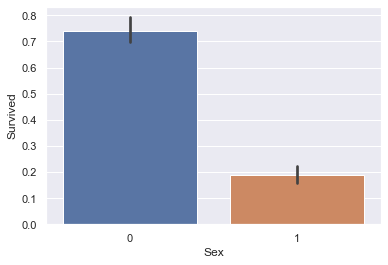

In [32]:
sns.barplot(x="Sex", y="Survived", data=train)
plt.show()


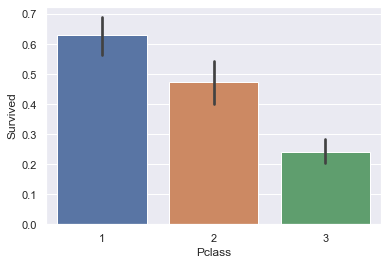

In [33]:
sns.barplot(x="Pclass", y="Survived", data=train)
plt.show()

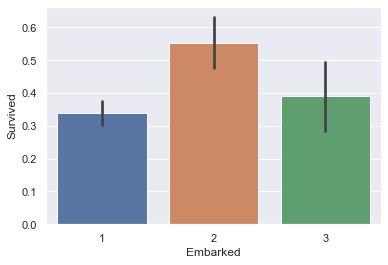

In [34]:
sns.barplot(x="Embarked", y="Survived", data=train)
plt.show()

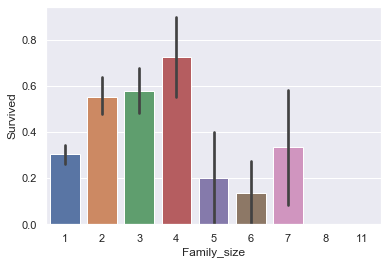

In [35]:
sns.barplot(x="Family_size", y="Survived", data=train)
plt.show()

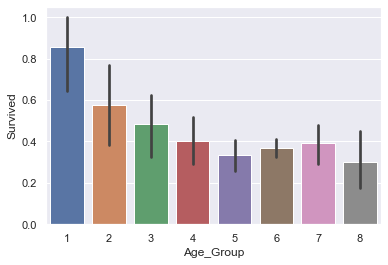

In [36]:
sns.barplot(x="Age_Group", y="Survived", data=train)
plt.show()

# spliting the training data

In [37]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [38]:
# define dependent and independent var
y=train['Survived']
x1=train[['Sex','Pclass','Family_size','Age_Group','Embarked']]

In [39]:
import statsmodels.api as sm
#Simple Logistic Regression
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.438442
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 12 Mar 2020   Pseudo R-squ.:                  0.3416
Time:                        14:00:10   Log-Likelihood:                -390.65
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.084e-85
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.2339      0.673      9.267      0.000       4.915       7.552
Sex            -2.7668      0.200    -13.822      0.000      -3.159      -2.374
Pclass         -1.1571      0.117     -9.877      0.000      -1.387      -0.928
Family_size    -0.2530      0.069     -3.667      0.000      -0.388      -0.118
Age_Group      -0.4230      0.074     -5.718      0.000      -0.568      -0.278
Embarked        0.3031      0.140      2.158      0.031       0.028       0.578
===============================================================================
"""

In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.7


In [42]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.25


In [44]:
# creating submission file
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('SubmissioN.csv', index=False)